In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import json
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import folium
import pandas as pd
import seaborn as sns
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [40]:

city_path = 'tract/LA_city.geojson'
city_data = gpd.read_file(city_path)
# Convert gdf to GeoJSON format
gdf_json = city_data.to_json()

building_path = "Residential_finished/geojson_0.json"
building_data = gpd.read_file(building_path)
# Ensure it's in the correct CRS
building_data = building_data.to_crs(epsg=4326)

# Convert it to GeoJSON
building_data_json = building_data.to_json()
building_data.head(5)

,OBJECTID,CODE,BLD_ID,YearBuilt1,HEIGHT,ELEV,footprint,UseType,UseDescription,Shape_Length_1,Shape_Area_1,geometry
0,37,Building,503291745320,1977,22.26,38.51,1622.0,Residential,Three Units (Any Combination),359.092502,4425.734266,"MULTIPOLYGON (((-118.19224 33.78813, -118.1922..."
1,40,Building,509892745808,1923,9.92,32.60,356.0,Residential,Five or more apartments,401.899783,8903.658400,"MULTIPOLYGON (((-118.17043 33.78950, -118.1703..."
2,43,Building,503428745279,1927,18.32,35.89,909.0,Residential,Five or more apartments,396.180197,7405.475791,"MULTIPOLYGON (((-118.19170 33.78794, -118.1917..."
3,46,Building,502311745717,1977,21.89,37.31,2446.0,Residential,Four Units (Any Combination),400.130086,7503.758366,"MULTIPOLYGON (((-118.19549 33.78922, -118.1952..."
4,52,Building,498043745228,1938,11.64,23.23,644.0,Residential,Single,331.425290,5046.112344,"MULTIPOLYGON (((-118.20936 33.78779, -118.2094..."


In [41]:
print(gdf_json is None)
print(building_data_json is None)
print(m is None)

False
False
False


In [56]:
# Define the coordinates of where we want to center our map
lat, long = 33.78813, -118.19224

# Create a map centered around your location
m = folium.Map([lat, long], zoom_start=12.5, tiles='CartoDB Positron')

# Create a style function for highlighting the area on hover
highlight_style = {
    'fillColor': '#000000',
    'color': '#000000'
}

# Function to be used in highlight_function
def style_function(feature):
    return {
        'fillColor': '#000000',
        'color': '#000000',
        'weight': 0.5,
        'dashArray': '5, 5',
        'fillOpacity': 0.1
    }
def style_function_black(feature):
    return {
        'fillColor': '#000000',
        'color': '#000000',
        'weight': 1,
        'fillOpacity': 0.8
    }
# Add the GeoJSON data to the map with hover highlight functionality
folium.GeoJson(
    building_data_json,
    name="geojson",
    style_function=style_function_black
    # highlight_function=style_function,
    # tooltip=folium.GeoJsonTooltip(fields=['name'])  # Optional tooltip
).add_to(m)
m


# Add it to your map
folium.GeoJson(gdf_json, 
               name="city", 
               style_function=style_function,
               highlight_function=style_function,).add_to(m)

# You can add a layer control feature to turn on and off your GeoJson layers
folium.LayerControl().add_to(m)
m.save('map.html')

In [58]:
building_data.head(5)

,OBJECTID,CODE,BLD_ID,YearBuilt1,HEIGHT,ELEV,footprint,UseType,UseDescription,Shape_Length_1,Shape_Area_1,geometry
0,37,Building,503291745320,1977,22.26,38.51,1622.0,Residential,Three Units (Any Combination),359.092502,4425.734266,"MULTIPOLYGON (((-118.19224 33.78813, -118.1922..."
1,40,Building,509892745808,1923,9.92,32.60,356.0,Residential,Five or more apartments,401.899783,8903.658400,"MULTIPOLYGON (((-118.17043 33.78950, -118.1703..."
2,43,Building,503428745279,1927,18.32,35.89,909.0,Residential,Five or more apartments,396.180197,7405.475791,"MULTIPOLYGON (((-118.19170 33.78794, -118.1917..."
3,46,Building,502311745717,1977,21.89,37.31,2446.0,Residential,Four Units (Any Combination),400.130086,7503.758366,"MULTIPOLYGON (((-118.19549 33.78922, -118.1952..."
4,52,Building,498043745228,1938,11.64,23.23,644.0,Residential,Single,331.425290,5046.112344,"MULTIPOLYGON (((-118.20936 33.78779, -118.2094..."


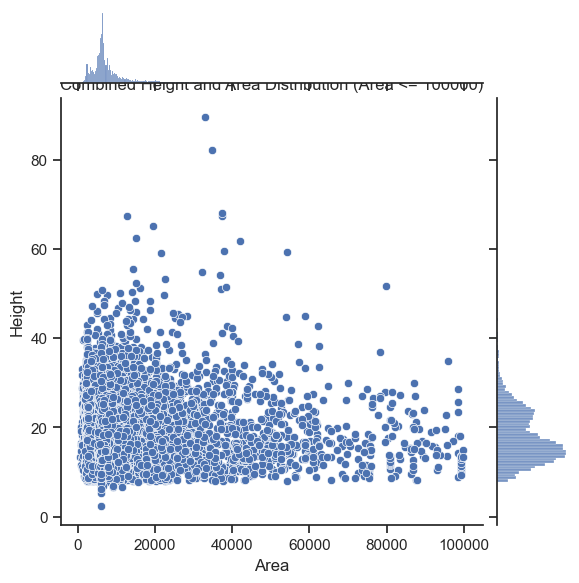

In [83]:
area_threshold = 100000  # Set the threshold for the maximum area
height_threshold = 100
filtered_data = building_data[(building_data['Shape_Area_1'] <= area_threshold) & (building_data['HEIGHT'] <= height_threshold)]

sns.set(style="ticks")
sns.jointplot(data=filtered_data, x='Shape_Area_1', y='HEIGHT')

plt.xlabel('Area')
plt.ylabel('Height')
plt.title('Combined Height and Area Distribution (Area <= {})'.format(area_threshold))

plt.show()

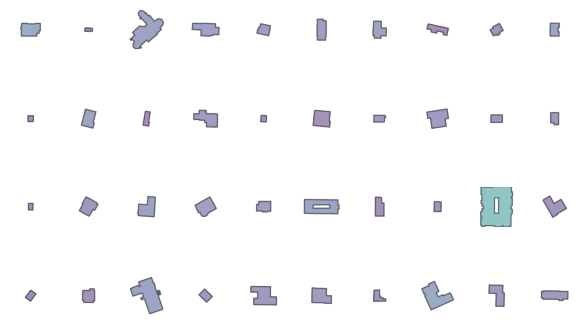

In [79]:
folder_path = 'img/geojson_0/'

image_files = os.listdir(folder_path)

row = 4
col = 10
random_images = random.sample(image_files, row*col)
fig, axes = plt.subplots(row, col, figsize=(6,4))

for i, image_file in enumerate(random_images):
    img = mpimg.imread(os.path.join(folder_path, image_file))
    height, width, _ = img.shape
    
    # Calculate the crop range for the middle 50 pixels
    pixel = 120
    top = (height - pixel) // 2
    bottom = top + pixel
    left = (width - pixel) // 2
    right = left + pixel
    
    # Crop the image
    cropped_img = img[top:bottom, left:right, :]
    
    ax = axes[i // col, i % col]  # Get the current subplot
    ax.imshow(cropped_img)
    ax.axis('off')

plt.tight_layout()
plt.show()